In [ ]:
"""TODO
 - determine bounds on distance error (bicycle to obstacle) corresponding to time sync error
"""

In [1]:
import os
import subprocess
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import lidar
import util

%load_ext autoreload
%autoreload 2

In [ ]:
# run cell for interactive plots
import mpld3
mpld3.enable_notebook()

In [2]:
def set_title(ax, title):
    try:
        mpld3
    except NameError:
        ax.figure.suptitle(title)
    else:
        ax.set_title(title)

In [3]:
DEFAULT_FIGSIZE = (14, 7)

In [4]:
records = lidar.load_records(sync=False)

Unable to determine range 2
Unable to determine range 1


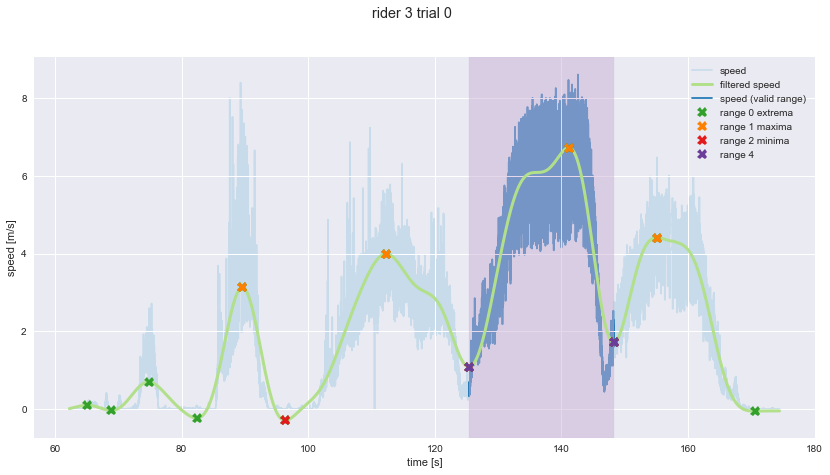

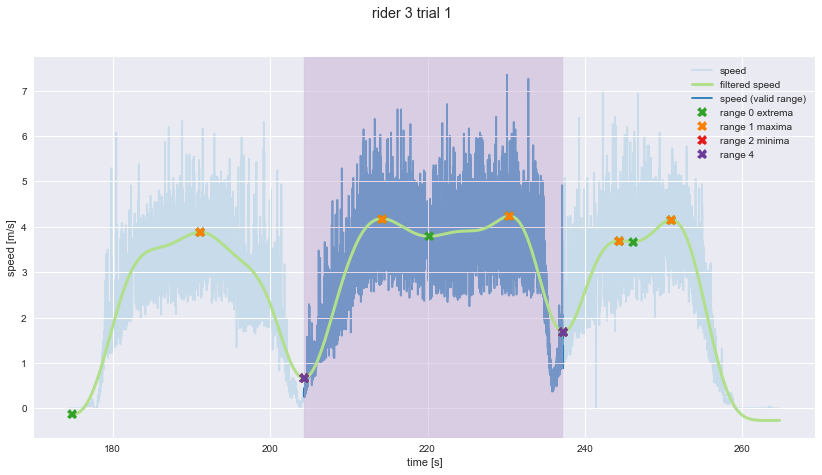

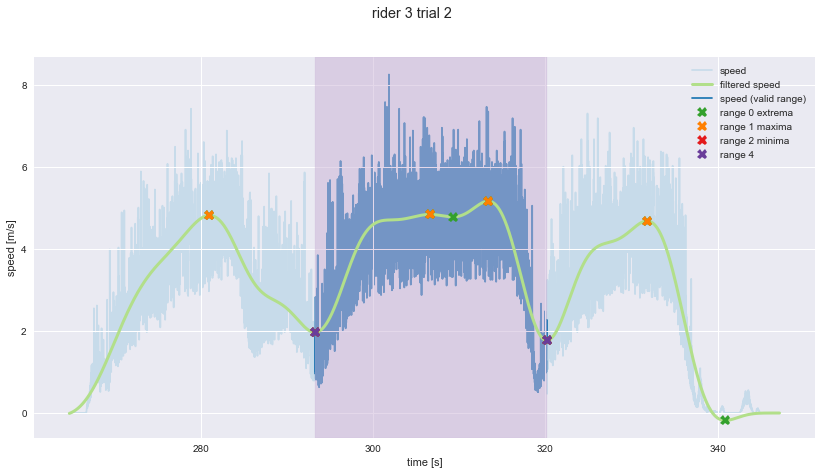

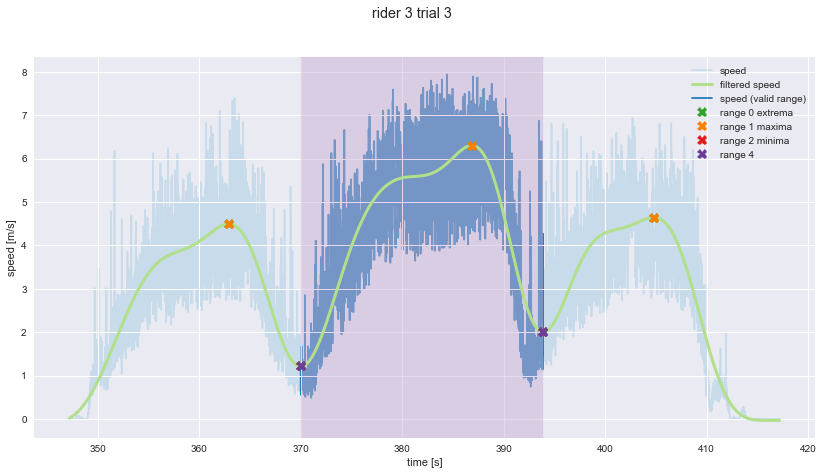

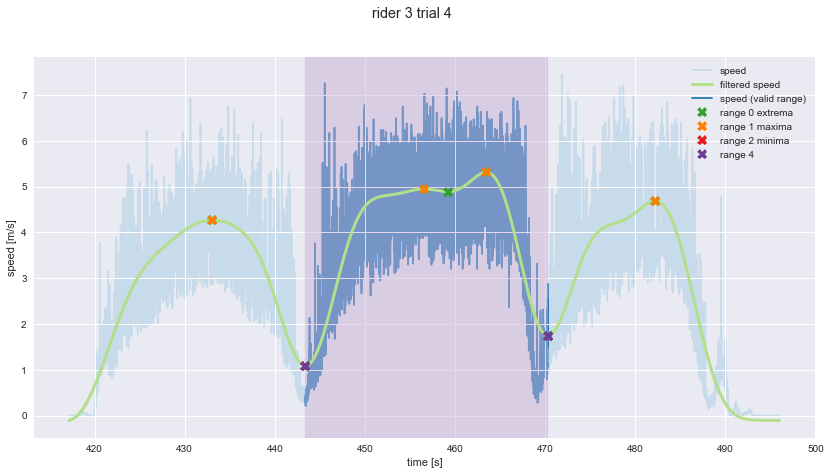

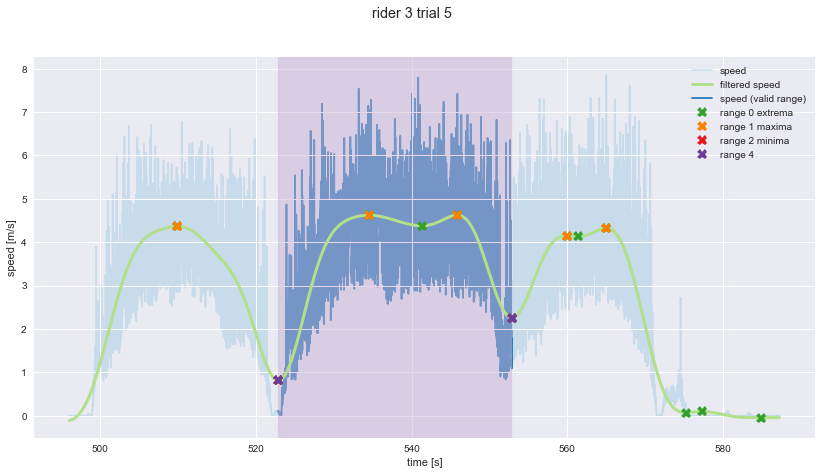

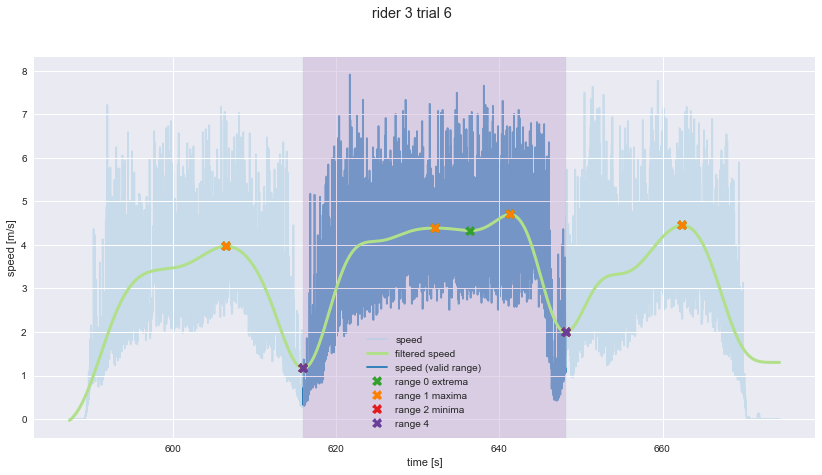

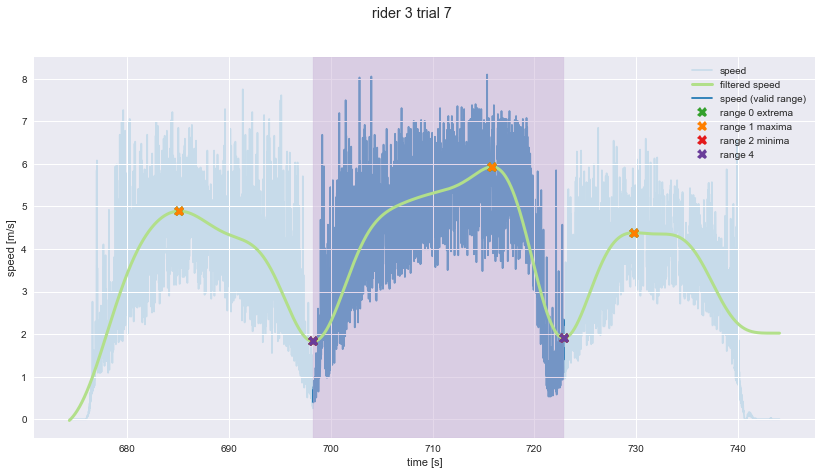

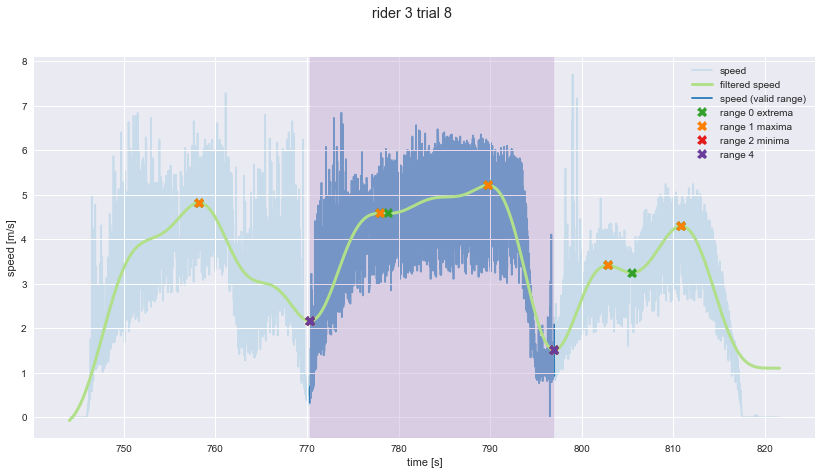

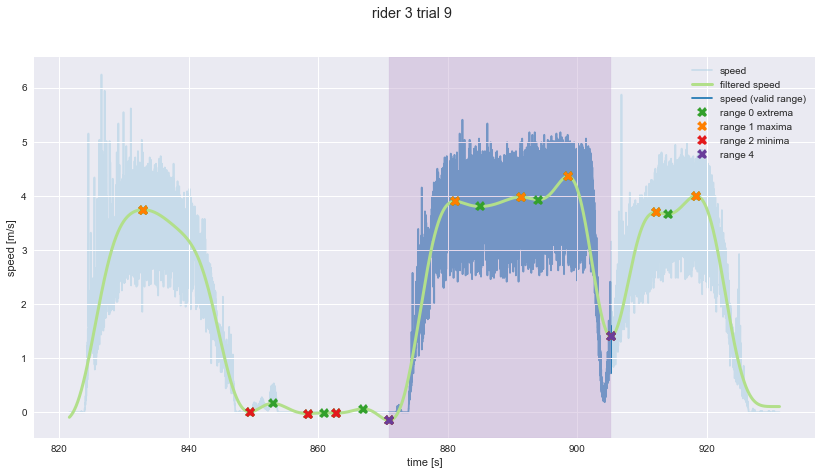

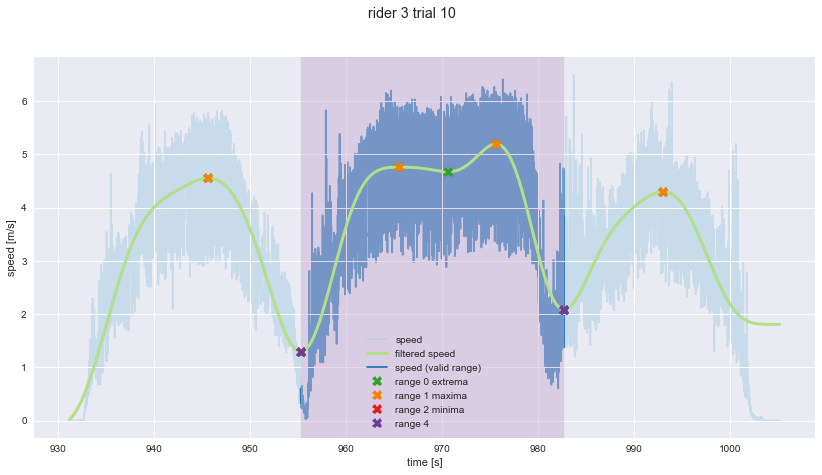

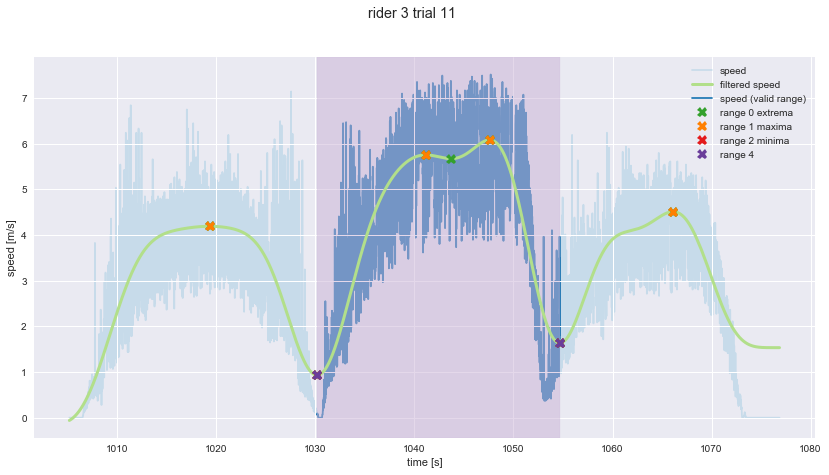

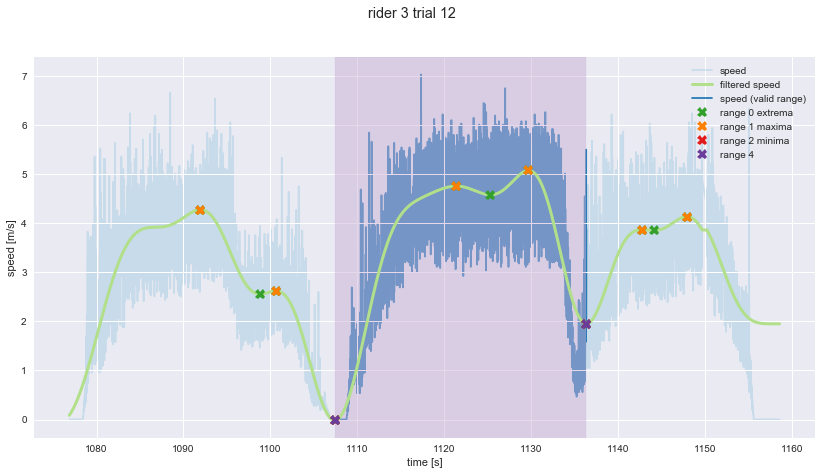

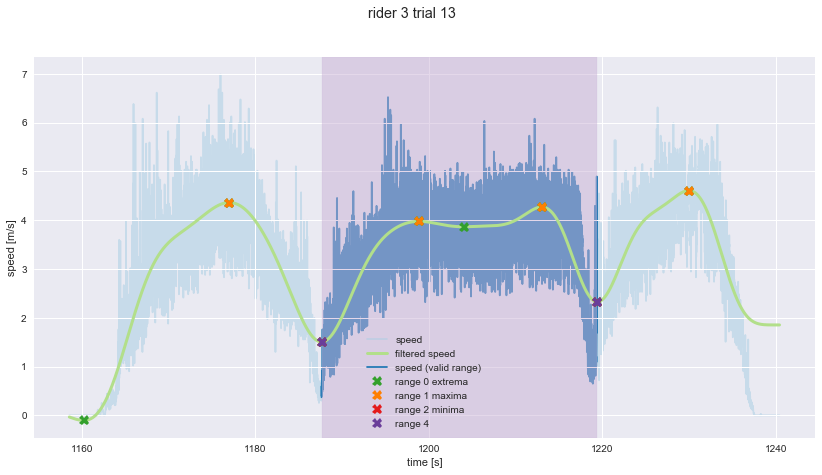

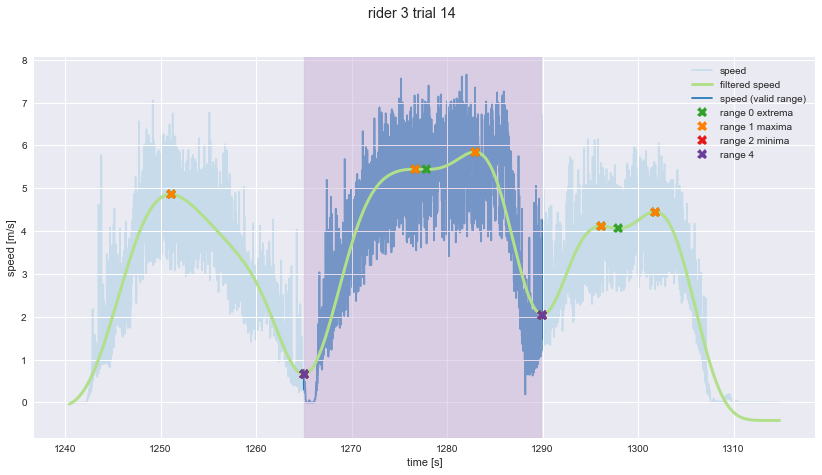

In [5]:
colors = sns.color_palette('Paired', 10)
rid = 3
r = records[rid]
for tid, tr in enumerate(r._trial):
    fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
    
    r0, r1, r2, r3, r4 = r._trial_range_index[tid]
    span = lambda r: slice(r[0], r[-1])
    
    v = r._cheby1_low_pass_filter(tr.speed)
    ax.plot(tr.time, tr.speed, alpha=0.5, color=colors[0], label='speed', zorder=0)
    ax.plot(tr.time, v, color=colors[2], linewidth=3, label='filtered speed', zorder=1)
    try:
        ax.plot(r.trial(tid).time, r.trial(tid).speed, color=colors[1], label='speed (valid range)', zorder=0)
    except TypeError:
        pass
    
    ax.plot(tr.time[r0], v[r0], 'X', markersize=10, color=colors[3], label='range 0 extrema')
    if r1 is not None:
        ax.plot(tr.time[r1], v[r1], 'X', markersize=10, color=colors[7], label='range 1 maxima')
    if r2 is not None:
        ax.plot(tr.time[r2], v[r2], 'X', markersize=10, color=colors[5], label='range 2 minima')
    if r4 is not None:
        ax.plot(tr.time[r4], v[r4], 'X', markersize=10, color=colors[9], label='range 4')
        ax.axvspan(tr.time[r4][0], tr.time[r4][-1], color=colors[8], alpha=0.5)
    
    ax.set_xlabel('time [s]')
    ax.set_ylabel('speed [m/s]')
    ax.legend()
    set_title(ax, 'rider {} trial {}'.format(rid, tid))
plt.show()